# 데이터의 chroma STFT를 관찰하는 프로그램

In [1]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [3]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


# 에너지가 높은 부분만 음성파일 듣기 - 개 뚜레기 인듯??

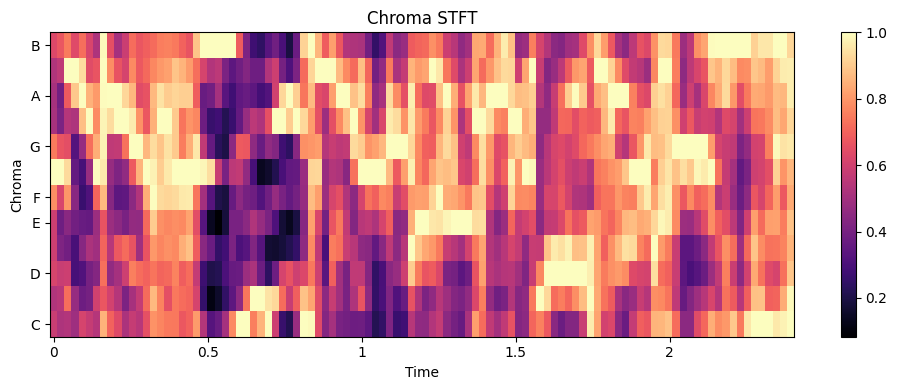

In [6]:
import numpy as np
import librosa
import librosa.display
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt

# 오디오 파일 로드
filename = "./train/RUNQPNJF.ogg"
y, sr = librosa.load(filename)

# STFT 계산
stft = np.abs(librosa.stft(y))

# Chroma STFT 계산
chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)

# Chroma STFT 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma STFT')
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.tight_layout()
plt.show()

# 크로마 STFT의 에너지가 큰 부분 식별
# 여기서는 각 시간 프레임의 크로마 STFT 값의 합을 사용하여 에너지를 계산합니다.
energy = np.sum(chroma_stft, axis=0)

# 임계값 설정 (상위 50% 에너지 프레임 선택)
threshold = np.percentile(energy, 50)

# 에너지가 큰 프레임 식별
high_energy_indices = np.where(energy >= threshold)[0]

# 해당 프레임의 오디오 데이터 추출
hop_length = 512  # 크로마 STFT의 hop_length와 동일해야 함
high_energy_audio = []

for idx in high_energy_indices:
    start_sample = idx * hop_length
    end_sample = start_sample + hop_length
    high_energy_audio.append(y[start_sample:end_sample])

high_energy_audio = np.concatenate(high_energy_audio)

# 추출한 오디오 데이터 재생
sd.play(high_energy_audio, sr)
sd.wait()

In [25]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

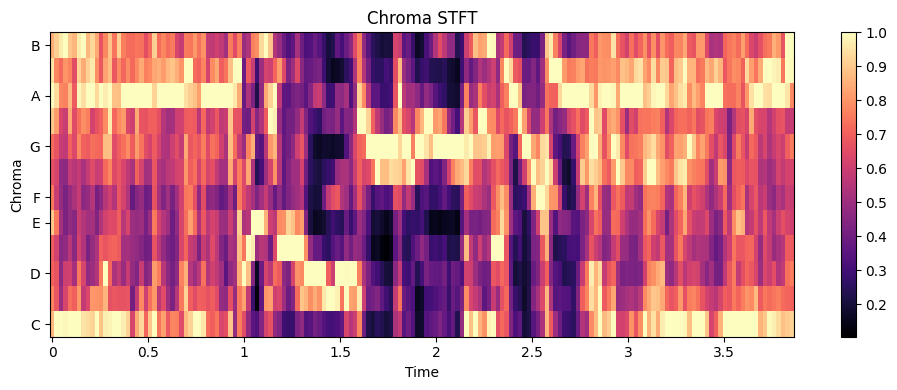

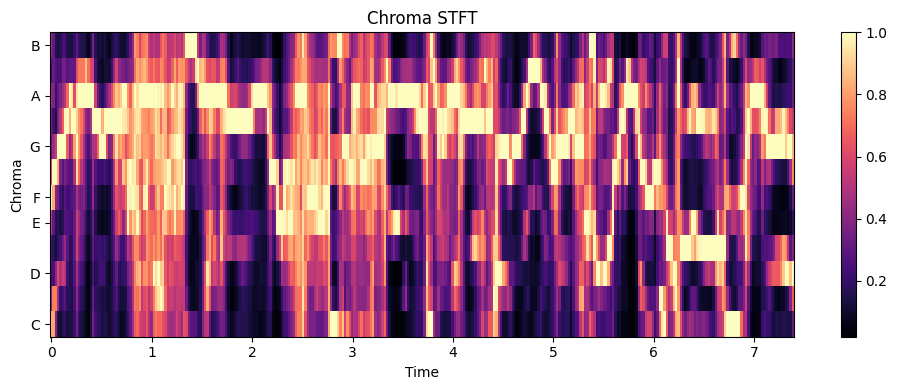

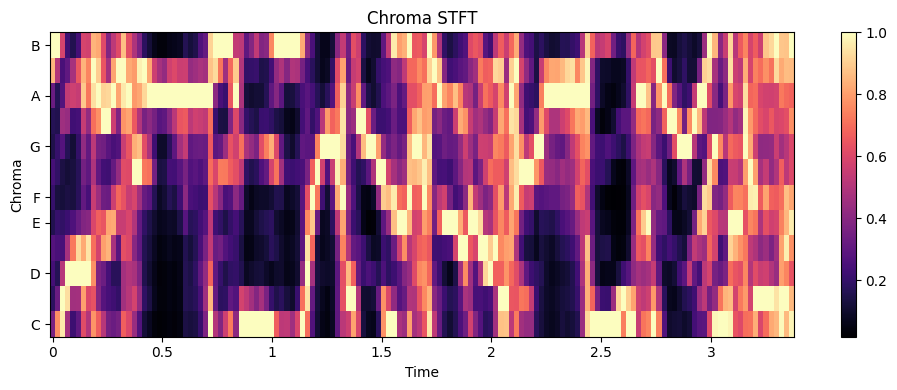

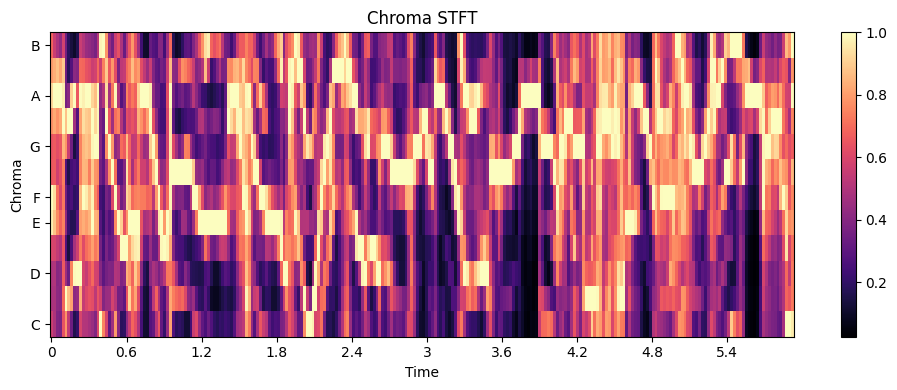

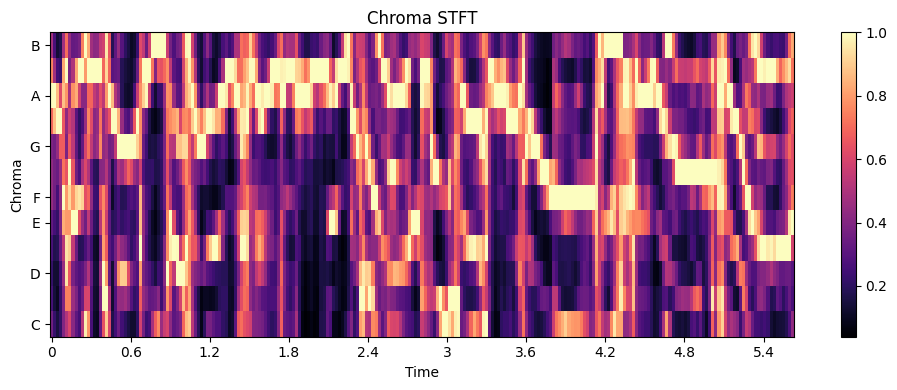

In [12]:
for index, row in train_sample_real_df.iterrows():
    audio_file = row['path']
    
    # 오디오 파일 로드
    y, sr = librosa.load(audio_file)

    # STFT 계산
    stft = np.abs(librosa.stft(y))

    # Chroma STFT 계산
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)

    # Chroma STFT 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Chroma STFT')
    plt.xlabel('Time')
    plt.ylabel('Chroma')
    plt.tight_layout()
    plt.show()

## train fake

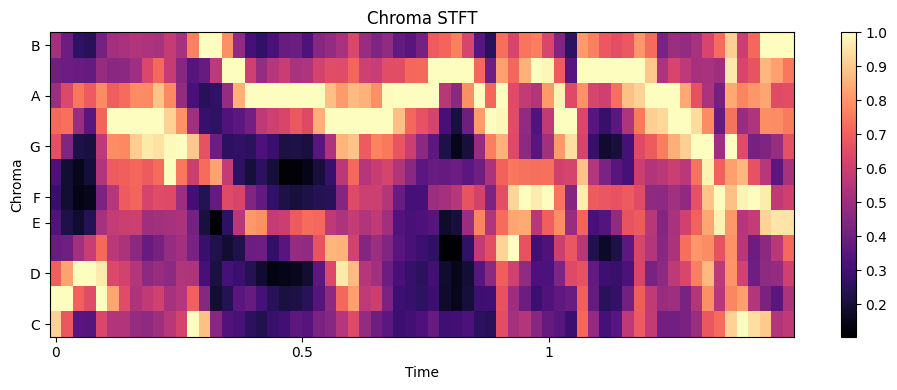

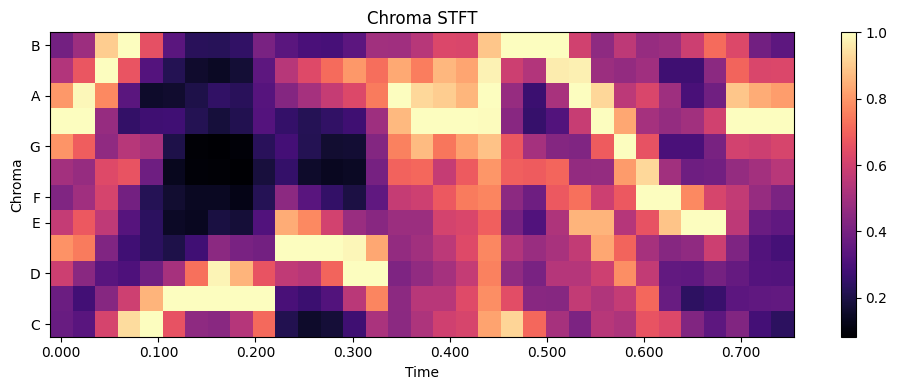

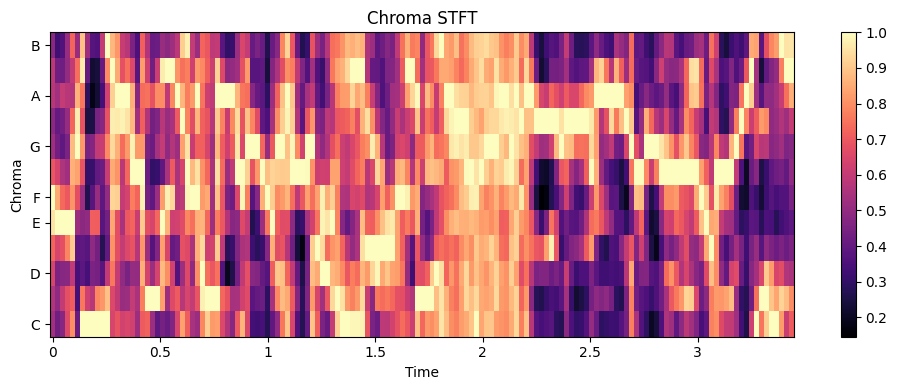

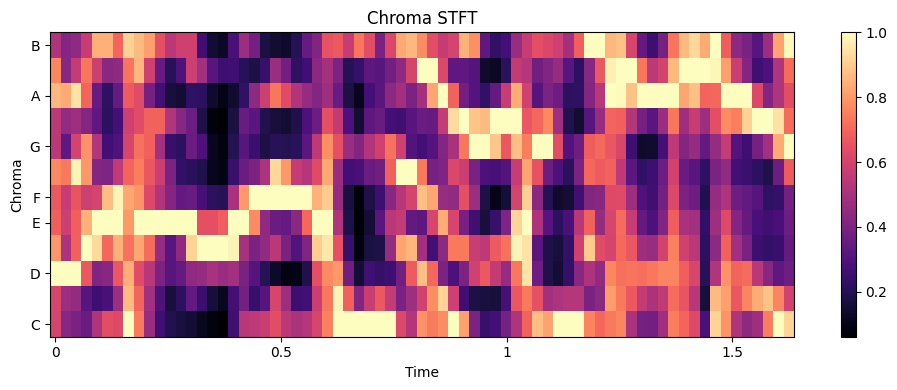

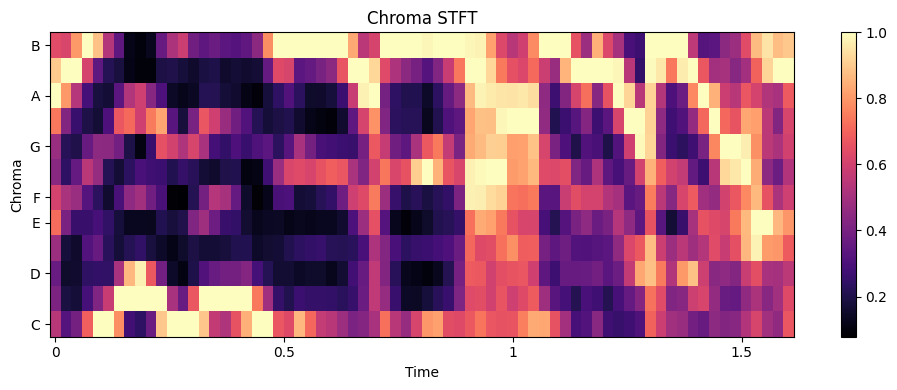

In [13]:
for index, row in train_sample_fake_df.iterrows():
    audio_file = row['path']
    audio_file = row['path']
    
    # 오디오 파일 로드
    y, sr = librosa.load(audio_file)

    # STFT 계산
    stft = np.abs(librosa.stft(y))

    # Chroma STFT 계산
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)

    # Chroma STFT 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Chroma STFT')
    plt.xlabel('Time')
    plt.ylabel('Chroma')
    plt.tight_layout()
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [14]:
# for index, row in test_sample_df.iterrows():
#     